<img alt="logo" height="100" src="img/logo.jpeg" width="100"/>   

# REGRESIÓN LINEAL #
### Definición ###
Hay diferentes tipos de regresión lineal, y la más sencilla y práctica para aprender machine learning es la **regresión lineal simple**. Esta consta de una variable independiente y otra variable dependiente, pudiendo existir una relación entre ambas variables que hará que, a medida que aumenta el valor de una la otra lo haga proporcionalmente.  

En estadística, la **regresión lineal simple** (o el ajuste lineal) es un modelo matemático utilizado para encontrar la relación de dependencia entre una variable dependiente (y) y otra independiente (X). En el caso de la regresión lineal múltiple buscaría la relación entre una variable dependiente y 'm' variables independientes.   


 <img width="460" height="300" src="img/linealregresion.png" >   

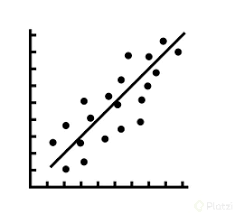

### Desarrollo de un modelo de regresión lineal en Python ###

Se va a ir generando el código de la regresión lineal simple paso a paso para una mejor compresión 

### PASO 1 - GENERACIÓN DEL DATAFRAME (PANDAS) CON LOS DATOS A ANALIZAR ###

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ------------------------------------
# Crear dataframe con los datos de facturación de clientes
data = {'customer_id': [1, 2, 3, 4, 5],
        'billing_amount': [100, 200, 150, 300, 250],
        'sales': [2, 4, 3, 6, 5]
}
clients = pd.DataFrame(data)

### PASO 2 - ANÁLISIS INICIAL DEL CONTENIDO DEL DATAFRAME ###

Se muestran, a modo de comprobación,  los datos almacenados en el dataframe

In [20]:
print(clients)

   customer_id  billing_amount  sales
0            1             100      2
1            2             200      4
2            3             150      3
3            4             300      6
4            5             250      5


Se comprueban los tipos de datos contenidos en el conjunto de datos y las dimensiones dataframe

In [21]:
print(clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     5 non-null      int64
 1   billing_amount  5 non-null      int64
 2   sales           5 non-null      int64
dtypes: int64(3)
memory usage: 252.0 bytes
None


Se muestra la información sobre las dimensiones del dataframe

In [22]:
print(clients.shape)

(5, 3)


### PASO 3 - PARTICIONADO DE DATOS PARA GENERAR CONJUNTOS TRAIN Y TEST ###

In [23]:
X_train, X_test, y_train, y_test = train_test_split(clients['billing_amount'], clients['sales'], random_state=20)

Con esta línea de código indicamos que se cree, genere y divida los datos de cliente en varios conjuntos de datos de entrenamiento y prueba:  

- Datos de entrada: 'customer_id'.
- Variable dependiente: 'billing_amount', importe de facturación del cliente.
- random_state: se genera una semilla aleatoria para dividir los datos de forma consistente cada vez que ejecutamos el código.
- X_train: datos de entrada del conjunto de entrenamiento. Información que se usa para entrenar el modelo.
- X_test: datos de entrada del conjunto de prueba. Información que se usa para testear el rendimiento del modelo ya entrenado.
- y_train: datos de salida del conjjunto de entrenamiento. Información objetivo que se usa para entrenar el modelo.
- y_test: datos de salida del conjunto de prueba. Información objetivo que se usa para testear el rendimiento del modelo ya entrenado.
  
Realizar esta partición es crucial para evaluar el rendimiento del modelo entrenado.

### Creación del Modelo de regresión lineal simple ###

In [24]:
lr = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

#### Predicción ###
Usamos el conjunto de test para realizar la predicción usando el modelo entrenado.

In [25]:
y_pred = lr.predict(X_test.values.reshape(-1, 1))

NOTA: X_test contiene los datos de entrada del conjunto de prueba. Con el "reshape(-1,1)" o con ".values.reshape(-1, 1)" se pretende redimensionar la matriz a las dimensiones que requiere el modelo LinearRegression() de SciKit-Learn. Según el conjunto de datos utilizado, es posible añadir directamente la variable o puede que sea necesario redimensionarla usando **reshape** o **values.reshape**.

#### Visualización de coeficientes mínimos cuadrados W1 y W0 ####

In [26]:
print("Coeficiente w1:", lr.coef_)
print("Coeficiente w0:", lr.intercept_)

Coeficiente w1: [0.02]
Coeficiente w0: 4.440892098500626e-16


#### Error cuadrático medio ####
El **error cuadrático medio (ECM o RMSE)** mide la diferencia al cuadrado entre el valor real y el valor predicho en el total de predicciones del modelo de Machine Learning utilizado, mostrando las diferencias más elevadas.  
En estadística, el error cuadrático medio es un estimador que mide el promedio de errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. Es un parámetro perfecto para medir la cantidad de error entre dos conjuntos de datos. Una explicación sencilla es decir que compara el valor predicho con el valor conocido, dando como resultado un coeficiente de error.

In [27]:
print(mean_squared_error(y_test, y_pred))

0.0


Por tanto, un valor bajo de RMSE supone un muy buen ajuste del modelo.

#### Coeficientes de determinación ####  

El coeficiente de determinación de entrenamiento y de pruebas debe ser parecido. Cuando encontramos que ambos valores tienen una diferencia grande suele significar que el modelo está mal ajustado. El coeficiente de determinación (R2) (R al cuadrado) se utiliza en estadística para cuantificar cómo de cerca están los puntos en la recta de regresión.

In [28]:
print("Valor del coeficiente de determinación del conjunto de entrenamiento:", round (lr.score(X_train.values.reshape(-1, 1), y_train), 3))
print("Valor del coeficiente de determinación del conjunto de prueba:", round (lr.score(X_test.values.reshape(-1, 1), y_test), 3))

Valor del coeficiente de determinación del conjunto de entrenamiento: 1.0
Valor del coeficiente de determinación del conjunto de prueba: 1.0


#### Ploteado de la gráfica de regresión lineal simple ####

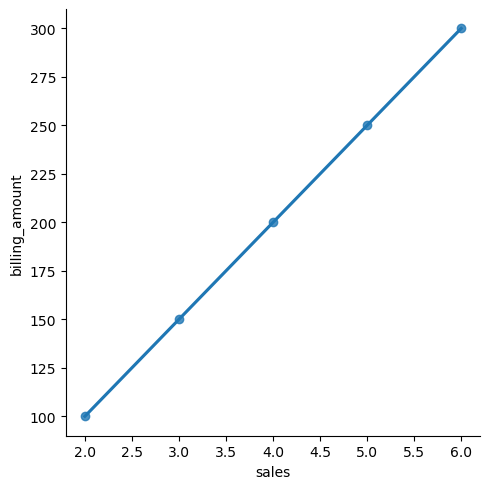

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de regresión lineal usando seaborn
sns.lmplot(x='sales', y='billing_amount', data=clients)
# Mostrar gráfico
plt.show()

#### Ploteado de la gráfica de relación entre variables del conjunto de datos ####

E:\Users\Jordi\anaconda3\envs\ceiadb\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\Jordi\anaconda3\envs\ceiadb\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\Jordi\anaconda3\envs\ceiadb\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


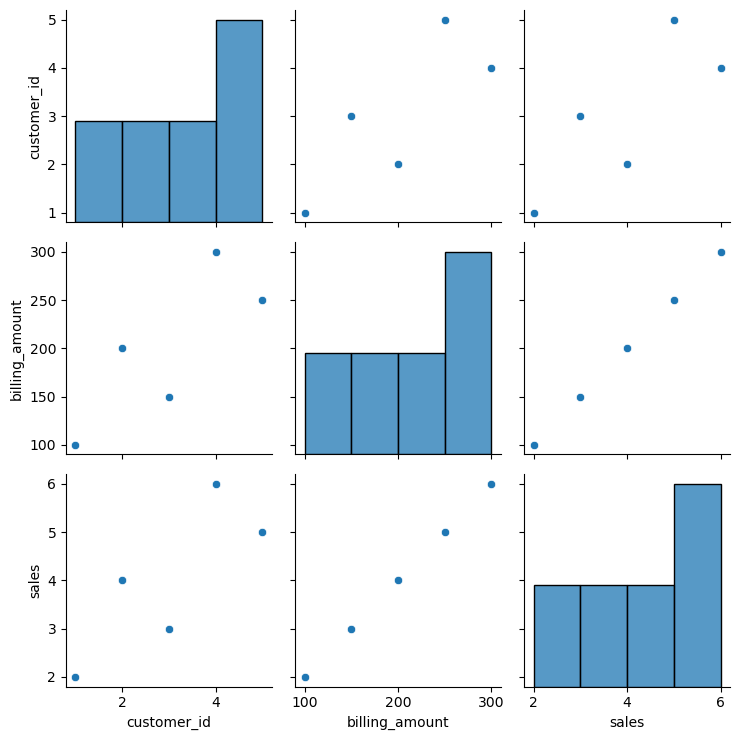

In [30]:
# Gráfico de relación entre variables del conjunto de datos.
sns.pairplot(clients, height=2.5)
plt.tight_layout()
plt.show()

#### Ploteado de la gráfica de datos de entrenamiento ####

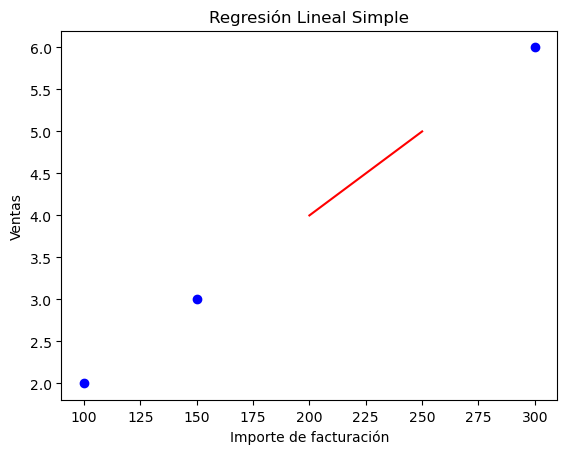

In [31]:
# Graficando los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue')

# Grafica de la regresión lineal con datos de la predicción
plt.plot(X_test, y_pred, color='red')
plt.title('Regresión Lineal Simple')
plt.xlabel('Importe de facturación')
plt.ylabel('Ventas')
plt.show()

Con esto ya tenemos creada una regresión lineal simple con Python.

Esta última gráfica, muestra los puntos de los datos de entrenamiento en color azul y la línea de regresión lineal en rojo.
La línea de regresión lineal representa el modelo que se ha entrenado para hacer predicciones.

La interpretación de la gráfica indica que, a medida que el número de ventas se incrementa, el importe de facturación también aumenta. Esto se ve reflejado en la pendiente positiva de la línea de regresión. Sin embargo, esta es una interpretación basada en una sola variable, si se utilizaran más variables se podría tener una interpretación más precisa y completa.